### K-Means Clustering for Customer Segmentation

### Research Question 
Using K-means clustering, can we identify distinct groups of customers based demographics such as their income and age? 

Goal of Analysis
A goal of this analysis would be to identify distinct differences between each of the defined demographic clusters with the ultimate goal of providing actionable insights. For example segments identified by clusters can be used for targeted marketing to sell additional services and features, prevent potential churn, and to address underlying service issues. 

### How K-Means Analyzes Data & Expected Outcomes 
The goal of the K-Means algorithm is to minimize the distance between the centroids of the clusters and the observations assigned to them. K-Means algorithms work by randomly selecting points in the dataset and establishing them as centroids. Observations in the dataset are assigned to these centroids based on their distance from the centroid. The centroid is then recalculated to be the absolute center of the assigned points. This process is repeated, reassigning observations to correct clusters based on the newly calculated centroid. This process is repeated until all observations remain in the same cluster (Nagar, 2020).

For this analysis, I used K-Means ++ which only initializes one random centroid, the second centroid is established after all distances between observations and the first centroid are made. The second centroid is identified as the farthest squared distance from the first randomly assigned centroid. This is preferred because fully randomized initialization will result in differences between each repeated run of the algorithm.

The expected outcomes for the initialized run of the algorithm are distinct clusters of observations calculated from one initial random centroid. The initial outcome will not be optimized for number of centroids. Repeated trials of K-Means to determine which number of clusters best minimizes the dataset to the centroids. The final outcome after optimization will be that K-Means has divided the observations into distinct clusters with similar properties which can be used for further analysis and insights into the data. 


### Assumptions of Chosen Method 

K-means clustering assumes that clusters are spherical and that features used in the analysis have equal variance. This means that K-means is unable to model cluster with other geometric shapes and assumes all clusters have the same size and density. 

## Data Preparation 

K-Means clustering relies on the sum of the squared distance between each point and the chosen centroid for each cluster. The goal of K-Means is to minimize this distance between the points and their centroid. This makes the K-Means algorithm very sensitive to outliers as outlying points increase the average inertia or distance between the points and their centroid. An essential preprocessing goal will be to treat or remove outliers. 

### Variables Used
<u>Income</u> This is a continuous variable which indicates the customer's annual income.

<u>Age</u> This is a continuous variable that represents the age of the customer. 


In [3]:
# Load csv file into dataframe and view data

import pandas as pd
import numpy as np 

file = '/Users/dlweeks/Documents/Python/PROJECTS/KMeans Clustering/data/churn_clean.csv'
churndf = pd.read_csv(file)

# Expand column view to show all columns 
pd.set_option('display.max_columns', None)

# View first 10 rows 
churndf.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# View descriptive statistics for dataframe 

churndf.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


#### Check for Duplicates

In [6]:
# Check for duplicates using the duplicated function

churndf.duplicated().value_counts()

False    10000
Name: count, dtype: int64

#### Reduce Dataframe 

In [8]:
# Reduce Dataframe to the desired features for analysis

reduced = churndf.copy()
reduced = reduced.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Lat', 'Lng'], axis=1)

#### Check for Missing Values

In [10]:
# Count missing values in each column 

reduced.isnull().sum()


City                       0
State                      0
County                     0
Zip                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod              0
Tenure                     0
MonthlyCharge 

<Axes: >

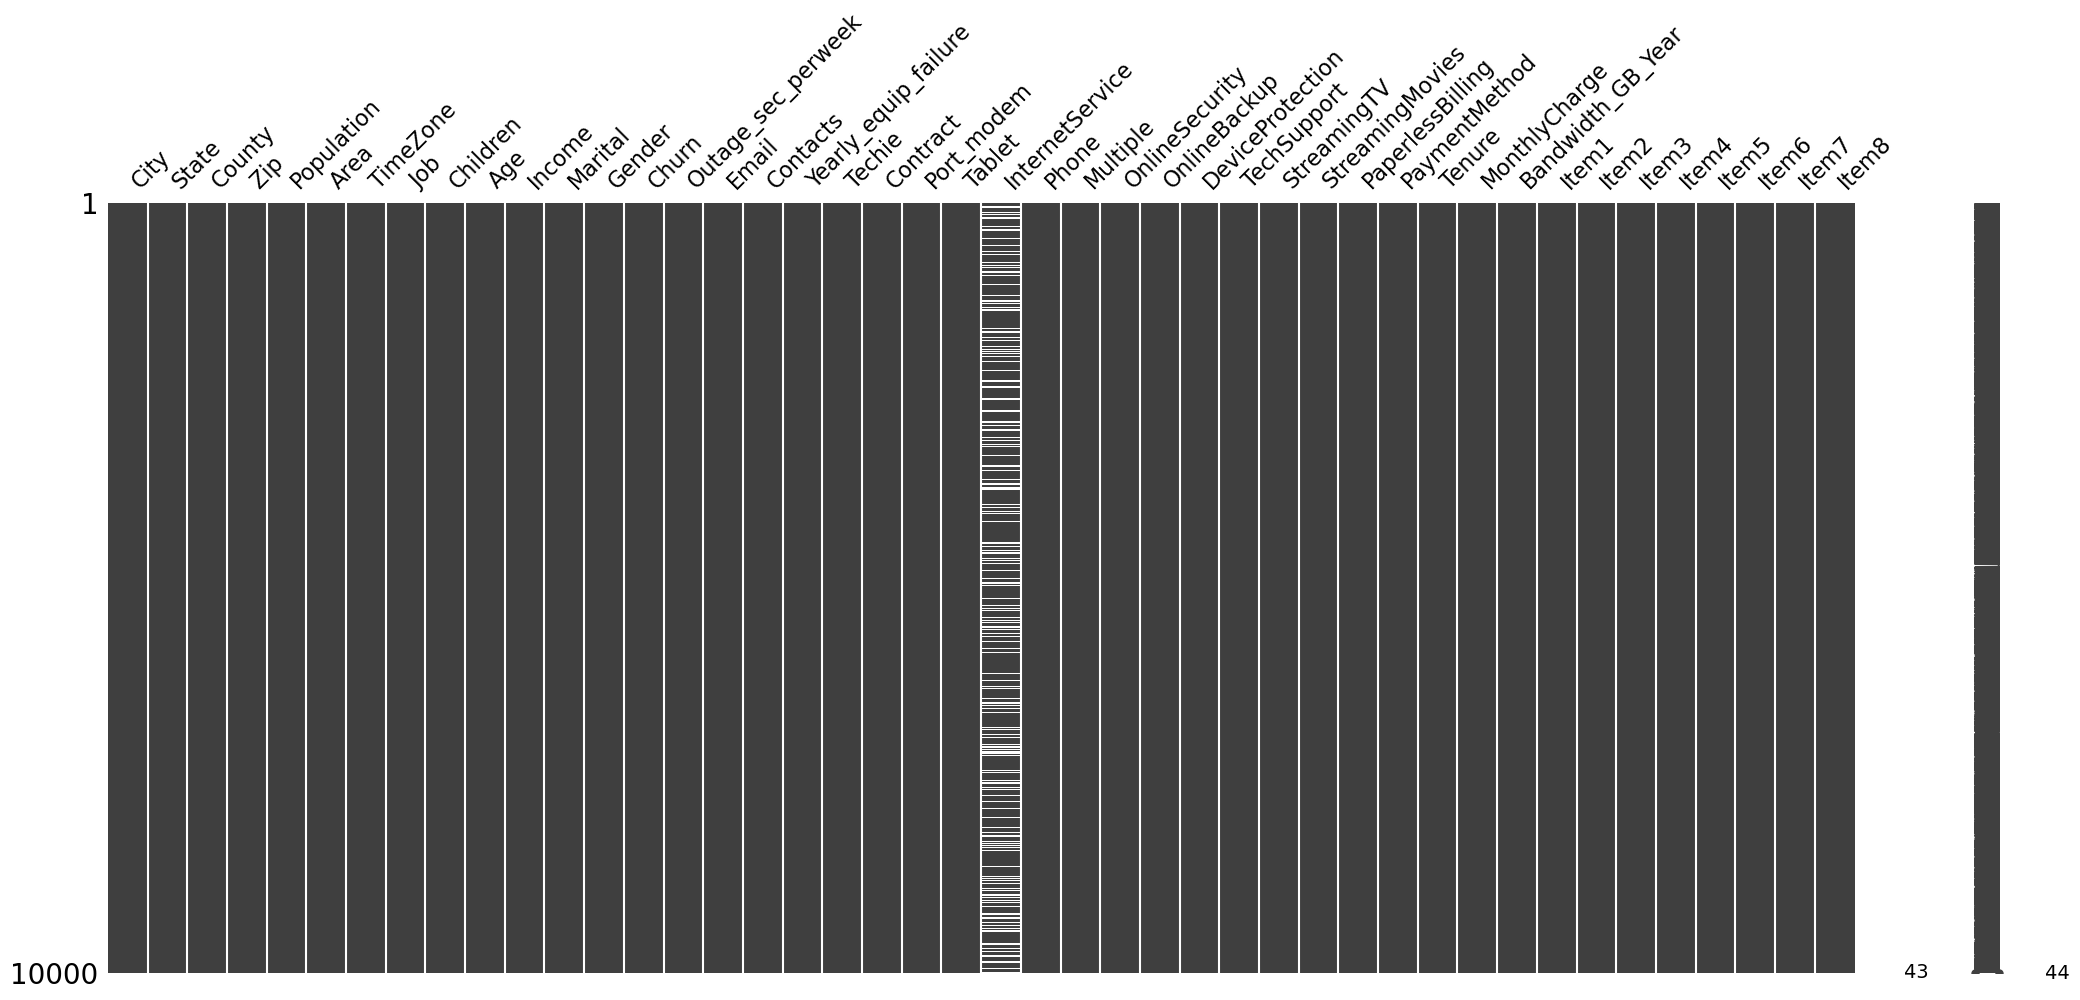

In [11]:
# Visualize potential missing values to confirm

import missingno as msno
msno.matrix(reduced)

<Axes: xlabel='Income', ylabel='Age'>

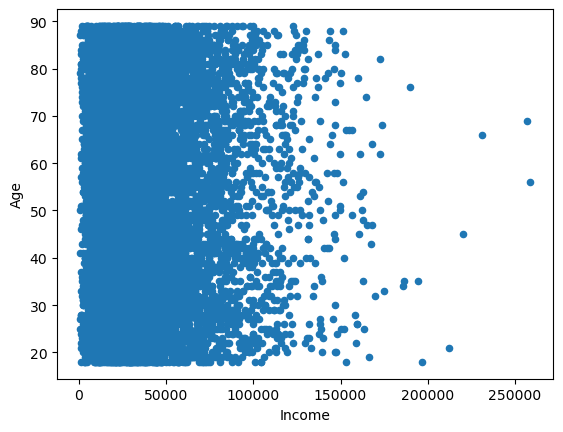

In [12]:
# Plot variables of interest 

reduced.plot.scatter(x="Income", y="Age")

### Identify and Treat Outliers 

Summary of Treatment for each feature  

<u>Age</u> This is uniformly distributed data with no outliers present. No treatment made.

<u>Income</u> This is right skewed data. Outlier treatment for this feature was a balance of preserving higher income groups for possible identification of a cluster related to this income bracket and reduction of outlying values to improve KMeans. Values over 100k income were identified as being outside the interquartile range. Opted to remove extreme outliers over 175k per year. 11 rows were removed. 

<Axes: xlabel='Age', ylabel='Count'>

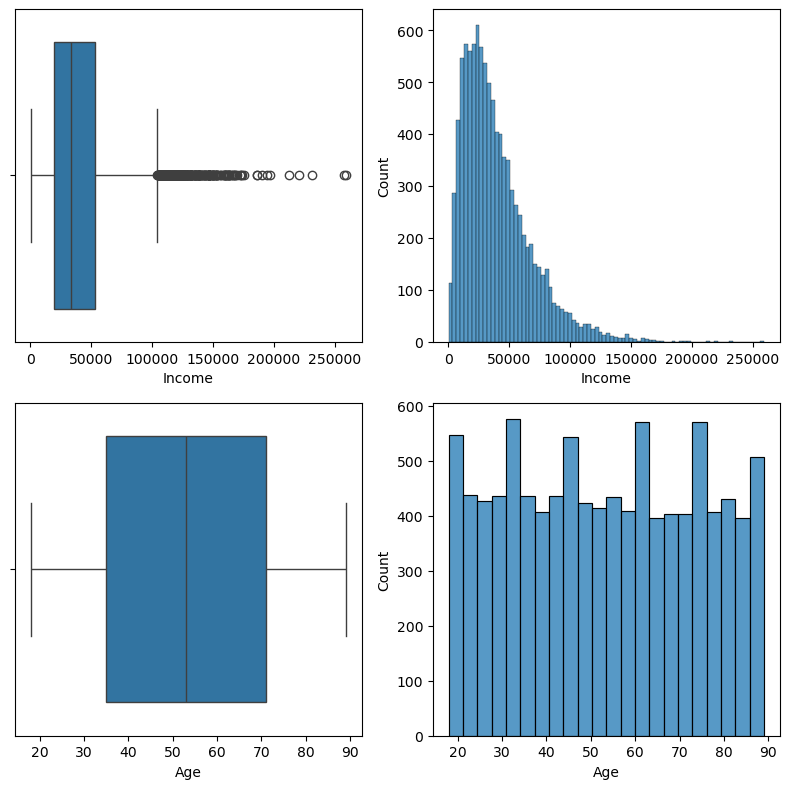

In [14]:
# Create boxplots and histograms for each of the features to view possible outliers
import seaborn 
from matplotlib import pyplot as plt

# Make a copy so that before and after treatment can be compared 
viscopy = reduced.copy()

#Adjust size parameters of figure
plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True 

# Plot boxplots and histograms for all features
fig, axes = plt.subplots(2,2)
seaborn.boxplot(x="Income", data=viscopy, ax=axes[0,0])
seaborn.histplot(data=viscopy, x = "Income", ax=axes[0,1])

seaborn.boxplot(x="Age", data=viscopy, ax=axes[1,0])
seaborn.histplot(data=viscopy, x = "Age", ax=axes[1,1])


#### Income Outlier Treatment

In [16]:
# View values over 175k annual income 
reduced.query('Income > 175000')

,City,State,County,Zip,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
972,Camp Lejeune,NC,Onslow,28547,25420,Suburban,America/New_York,Event organiser,8,34,186035.04,Married,Male,Yes,7.419287,12,2,0,No,Month-to-month,No,No,DSL,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Bank Transfer(automatic),2.258853,235.141716,1548.705967,3,4,5,5,2,4,3,5
2762,Woodbine,GA,Camden,31569,5831,Rural,America/New_York,Production engineer,1,33,175137.30,Never Married,Male,Yes,12.018560,14,1,1,No,Month-to-month,No,No,NaN,Yes,Yes,No,No,No,No,Yes,Yes,No,Electronic Check,18.210300,207.638600,2150.497966,4,3,3,4,1,3,3,3
3985,Houston,TX,Harris,77019,21319,Suburban,America/Chicago,"Accountant, chartered public finance",3,76,189938.40,Widowed,Female,Yes,8.208604,12,1,0,No,Month-to-month,Yes,No,NaN,Yes,Yes,No,No,No,Yes,No,Yes,No,Electronic Check,6.833364,159.980500,798.557141,4,5,5,2,4,3,5,3
4249,Tionesta,PA,Forest,16353,2660,Rural,America/New_York,Geochemist,0,56,258900.70,Divorced,Male,No,11.886440,15,1,1,No,Two Year,No,Yes,Fiber Optic,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Credit Card (automatic),8.870031,232.641500,1296.501758,4,3,4,5,3,3,5,2
5599,Haleyville,AL,Winston,35565,13266,Urban,America/Chicago,"Nurse, learning disability",1,45,220383.00,Divorced,Male,No,7.925637,14,1,2,Yes,Two Year,No,Yes,Fiber Optic,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Bank Transfer(automatic),59.608670,182.467600,5326.929680,5,3,4,2,4,3,1,6
5801,Chicora,PA,Butler,16025,5237,Suburban,America/New_York,"Surveyor, planning and development",0,21,212255.30,Never Married,Female,No,8.364859,10,0,1,Yes,Month-to-month,No,No,NaN,Yes,No,No,No,No,No,Yes,No,No,Electronic Check,58.502780,104.962900,5080.067605,3,3,3,4,4,3,4,3
6594,Cornell,MI,Delta,49818,972,Rural,America/Detroit,Energy manager,1,18,196746.00,Never Married,Male,No,7.834867,11,1,0,Yes,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,No,No,No,No,Yes,No,Credit Card (automatic),59.285350,182.465300,5378.117418,2,3,4,4,3,4,4,3
6649,West Union,IA,Fayette,52175,3522,Urban,America/Chicago,Hotel manager,2,66,231252.00,Separated,Nonbinary,No,6.463637,11,3,0,No,Month-to-month,No,Yes,DSL,Yes,No,No,Yes,Yes,Yes,No,No,Yes,Electronic Check,66.509000,139.983000,6047.422965,4,3,3,3,2,5,5,5
6837,Saint Jo,TX,Montague,76265,1602,Rural,America/Chicago,Chief Operating Officer,1,35,194550.70,Divorced,Female,No,7.939605,11,1,0,Yes,Month-to-month,No,Yes,NaN,No,No,No,No,Yes,Yes,Yes,Yes,No,Mailed Check,60.647950,200.165200,5591.655269,2,3,4,2,6,2,4,2
8830,Holly Grove,AR,Monroe,72069,1148,Rural,America/Chicago,Field trials officer,2,35,186156.60,Divorced,Male,No,12.473470,13,0,1,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Bank Transfer(automatic),65.669570,255.137200,6174.944351,4,4,3,3,3,5,4,2


In [17]:
# Drop rows with extreme outlying values

reduced.drop(reduced[(reduced.Income > 175000) ].index, inplace=True)

In [18]:
# Verify rows were removed

reduced.head()

,City,State,County,Zip,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,Point Baker,AK,Prince of Wales-Hyder,99927,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,West Branch,MI,Ogemaw,48661,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,Yamhill,OR,Yamhill,97148,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,Del Mar,CA,San Diego,92014,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,Needville,TX,Fort Bend,77461,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


### Standardize Data 

In [20]:
# Import Standard Scaler and fit to features used in analysis

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(reduced[['Income', 'Age']])

In [21]:
# Return scaled values to dataframe 

scaleddf = pd.DataFrame(scaled, columns = ['Income', 'Age'])

In [22]:
# Verify that data has been scaled 

scaleddf.describe().round(2)

,Income,Age
count,9989.00,9989.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.42,-1.70
25%,-0.74,-0.87
50%,-0.23,-0.00
75%,0.49,0.87
max,4.86,1.74



### Determine Optimal Number of Clusters & Describe Methods


#### Run initial model with 2 clusters

In [43]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init='k-means++', n_init='auto')

kmeans.fit(scaleddf)

KMeans(n_clusters=2, n_init='auto')

In [45]:
# Calculate inertia for initial model 
kmeans.inertia_

13443.632502313578

#### Use Elbow Method to Determine Optimal Number of Clusters

In [47]:
# Calculate squared error for each iteration of k-means with n number clusters

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init='auto')
    kmeans.fit(scaleddf)
    SSE.append(kmeans.inertia_)

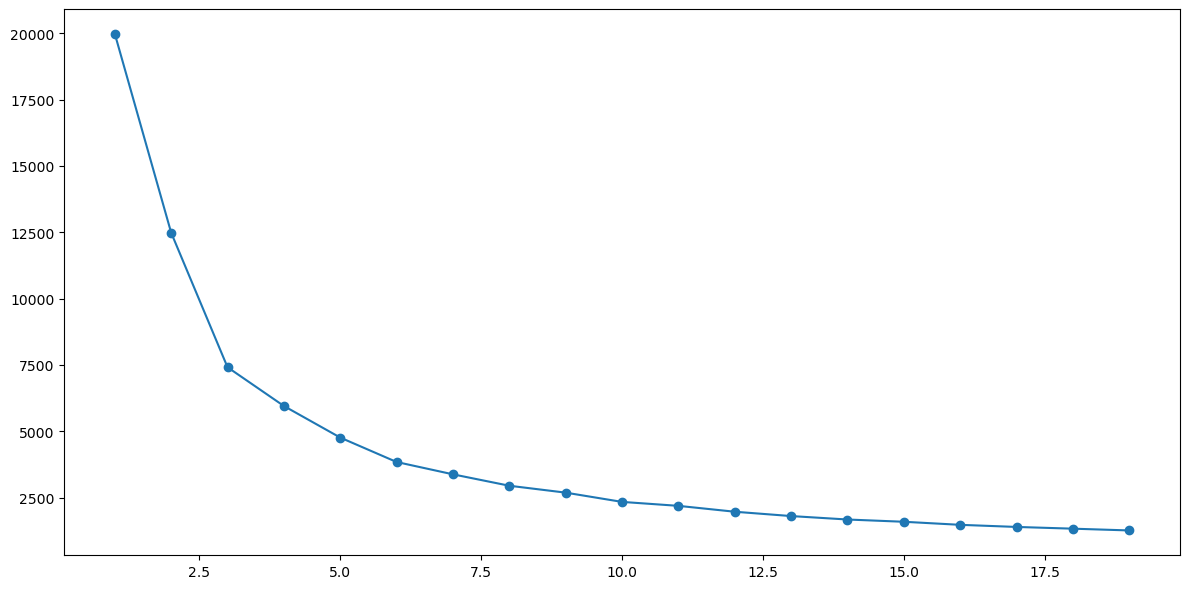

In [49]:
# Plot SSE for each number of clusters 

clusters = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(clusters['Cluster'], clusters['SSE'], marker='o')

#### Build Final Model Based on Results

In [51]:
# Run final model 

kmeans = KMeans(n_clusters = 6, init='k-means++', n_init='auto')
final_model = kmeans.fit(scaleddf)
predictions = kmeans.predict(scaleddf)

In [53]:
# Calculate final model inertia 

final_model.inertia_

3837.9444606478983

#### Examine insights into each cluster

In [56]:
# Add a column that indicates which cluster each row is assigned to  

reduced['Cluster'] = final_model.labels_
reduced

,City,State,County,Zip,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Cluster
0,Point Baker,AK,Prince of Wales-Hyder,99927,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,3
1,West Branch,MI,Ogemaw,48661,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0
2,Yamhill,OR,Yamhill,97148,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,1
3,Del Mar,CA,San Diego,92014,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,1
4,Needville,TX,Fort Bend,77461,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mount Holly,VT,Rutland,5758,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3,5
9996,Clarksville,TN,Montgomery,37042,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5,1
9997,Mobeetie,TX,Wheeler,79061,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5,1
9998,Carrollton,GA,Carroll,30117,35575,Urban,America/New_York,Water engineer,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4,0


<Axes: xlabel='Income', ylabel='Age'>

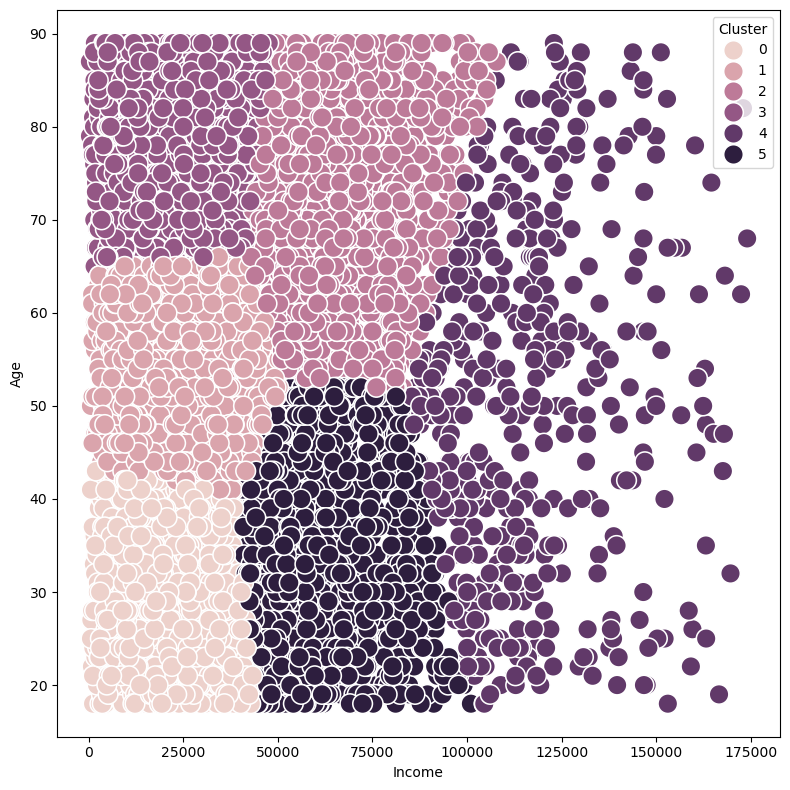

In [58]:
# Visualize clusters based on income and age 

seaborn.scatterplot(data = reduced, x = 'Income', y = 'Age', hue = 'Cluster', s=200)

### Additional Analysis to Gain Insight Into Clusters

#### Look at features related to service use, outage and satisfaction 

There are several key features that are related to the customer's use of bandwidth, outages, equipment failures and metrics related to customer's satisfaction with repairs and service reliability as well as tenur and churn. The following is a preparation of a dataframe which examines these features for comparison. 

In [72]:
# Create new dataframe related to the features defined above. 
outage = reduced.copy()
outage = outage[['Income', 'Age', 'Tenure', 'Contacts', 'Bandwidth_GB_Year', 'MonthlyCharge',
                  'Yearly_equip_failure', 'Outage_sec_perweek', 'Email','Churn','Techie','Item1',
                 'Item2', 'Item3', 'Item4','Cluster']]

# Rename columns from survey to meaningful titles 
outage.rename(columns = {'Item1': 'Timely_response', 'Item2': 'Timely_fix', 
                        'Item3': 'Timely_replace', 'Item4': 'Reliability'}, inplace=True)

# Replace yes/no answers with numeric answers so that averages can be calculated 

outage.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
outage.Techie.replace(('Yes', 'No'), (1, 0), inplace=True)

# Examine averages for each features 

outage.groupby('Cluster').mean().round(3)

,Income,Age,Tenure,Contacts,Bandwidth_GB_Year,MonthlyCharge,Yearly_equip_failure,Outage_sec_perweek,Email,Churn,Techie,Timely_response,Timely_fix,Timely_replace,Reliability
Cluster,,,,,,,,,,,,,,,
0,22193.593,29.606,34.338,0.969,3451.046,173.276,0.382,10.032,12.075,0.259,0.162,3.507,3.506,3.501,3.487
1,25098.613,53.700,34.232,1.019,3358.784,171.071,0.402,10.033,11.997,0.261,0.174,3.500,3.500,3.486,3.548
2,64372.922,71.452,35.060,1.001,3381.909,174.379,0.410,9.933,11.936,0.264,0.176,3.491,3.551,3.486,3.548
3,23500.949,77.812,34.924,0.996,3341.161,172.780,0.391,9.998,12.069,0.269,0.164,3.489,3.500,3.491,3.479
4,116178.034,50.557,34.876,1.040,3431.338,170.431,0.387,9.935,12.013,0.267,0.153,3.450,3.439,3.426,3.395
5,60807.285,33.677,33.994,0.967,3424.870,172.749,0.414,10.011,11.969,0.273,0.167,3.470,3.497,3.481,3.445


In [74]:
# Define DF with service related features 

services = reduced.copy()
services = services[['Cluster', 'Tablet', 'Phone', 'Multiple', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]

# Get dummy variables for categorical variables 

services = pd.get_dummies(services, columns = ['Tablet', 'Phone', 'Multiple', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])

# Define dataframe with aggregate sums of each column for further calculations
ss = services.groupby('Cluster').sum()

# Find percentage of customers who subscribe to each service 
ss['Phone'] = ss.Phone_Yes / (ss.Phone_No + ss.Phone_Yes)
ss['Tablet'] = ss.Tablet_Yes / (ss.Tablet_Yes + ss.Tablet_No)
ss['Multiple'] = ss.Multiple_Yes / (ss.Multiple_Yes + ss.Multiple_No)
ss['OnlineSecurity'] = ss.OnlineSecurity_Yes / (ss.OnlineSecurity_Yes + ss.OnlineSecurity_No)
ss['OnlineBackup'] = ss.OnlineBackup_Yes / (ss.OnlineBackup_Yes + ss.OnlineBackup_No)
ss['DeviceProtection'] = ss.DeviceProtection_Yes / (ss.DeviceProtection_Yes + ss.DeviceProtection_No)
ss['TechSupport'] = ss.TechSupport_Yes / (ss.TechSupport_Yes + ss.TechSupport_No)
ss['StreamingTV'] = ss.StreamingTV_Yes / (ss.StreamingTV_Yes + ss.StreamingTV_No)
ss['StreamingMovies'] = ss.StreamingMovies_Yes / (ss.StreamingMovies_Yes + ss.StreamingMovies_No)
ss['PaperlessBilling'] = ss.PaperlessBilling_Yes / (ss.PaperlessBilling_Yes + ss.PaperlessBilling_No)

# Define dataframe with percentages
percentages = ss[['Phone', 'Tablet', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling']]

# View percentage of service subscription by cluster 

percentages.round(2)

,Phone,Tablet,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
Cluster,,,,,,,,,,
0,0.90,0.31,0.48,0.36,0.45,0.43,0.36,0.49,0.50,0.59
1,0.90,0.29,0.45,0.36,0.45,0.42,0.38,0.49,0.47,0.59
2,0.91,0.30,0.47,0.36,0.45,0.46,0.38,0.50,0.50,0.58
3,0.91,0.30,0.45,0.35,0.46,0.45,0.38,0.49,0.50,0.59
4,0.91,0.30,0.45,0.33,0.41,0.44,0.39,0.48,0.48,0.58
5,0.90,0.31,0.46,0.36,0.47,0.44,0.37,0.50,0.49,0.59


## Summary and Implications
### Quality of Clusters

#### SSE - Sum of Squared Error / Inertia

Sum of squared error is a good measure of quality for this clustering analysis. The initial model, run with 2 initial clusters, has an inertia value of 12478. After elbow analysis, which optimizes the number of clusters to be used, the inertia value fell to 3837. Since inertia is a measure of the squared sum of the distance between each point and it's centroid, the lower inertia value indicates that the clusters in the final model are more cohesive or as close as possible to the centroid. 

On a qualitative level, the distinctness or separation of the clusters can be seen in the following chart. Each of the clusters represents a unique subset of the customer dataset based on age and income. These distinct categories can be investigated with other features to identify key differences between the groups to gain customer insights based on demographics.

|Income|Age|Cluster|
|:---|:---|:---|
|Low Income|Low Age |Cluster 0|
|Low Income|High Age|Cluster 1|
|Low Income|Middle Age|Cluster 2|
|High Income|Middle Age(Avg Age)|Cluster 3|
|Middle Income|Low Age|Cluster 4|
|Middle Income|High Age|Cluster 5|

### Results and Implications

While the clustering does group customers into demographic brackets of age and income, the real insights come from further analysis by comparing these group by other features in the datasets. Breaking down the features by types of service and service reliability and outage we can see many differences between the groups with the following results for each group. 

<u>Cluster 0 - Low Income / Low Age</u> - This group is the least likely to churn. They are also the second highest cluster in terms of Monthly Charges and highest in annual bandwidth use. They are also one of the two groups with the lowest number of contacts to customer service but highest for email correspondence. Most likely to have multiple phone lines. They are least likely to have subscribed to tech support. We can say about this group that they have higher use of service, spend more, and are more independent in terms of technical support perferring email correspondence to phone support. 

<u>Cluster 1 - Low Income / High Age</u> - This group uses the least about of bandwidth of any other group and is one of the highest in terms of outages in their neighborhood. They are second most likely to contact by email and second most likely to churn. We can say about this group that they are low use and suffer from poorer service in their neighborhoods. 

<u>Cluster 2 - Low Income / Middle Age</u> - This is one of the two groups most likely to contact customer service. They use the least amount of bandwidth in a year out of all the groups. They are most likely to report reliable service. They are least likely to have a tablet, device protection add-on, and the least likely to stream movies. We can say about this group that the use a lower number of services and add-ons, streaming less and using less bandwidth. 

<u>Cluster 3 - High Income / Middle Age(Avg Age)</u> - This is the group most likely to contact customer service and most likely to have a Tech Support Add-On. The spend the least on service out of any group. They are additionally less likely to consider themselves technically inclined. This group is least likely to rate the service as reliable despite having the lowest outages and second to lowest equipment failures of any group. They are least likely to have Online Security and Online Backup Add-Ons. We can say about this group that they are less independent and less technically inclined, most likely to complain and least likely to spend. 

<u>Cluster 4 - Middle Income / Low Age</u> - This group is the most likely to have service outages in their neighborhoods. They have the shortest tenure and are most likely to churn. They are also the most likely to use the Online Backup Add-On. We can say about this group that they are receiving poorer service than other groups. 

<u>Cluster 5 - Middle Income / High Age</u> - This group spends more per month than any other group. They have the lowest neighborhood outages and are least likely to correspond with the company by email. They are most likely to consider themselves technologically inclined and rate the service as reliable and have the longest tenure of any other group. They are also most likely to have Device Protection Add-Ons. We can say about this group that they are highly independent, both technologically inclined and have a higher use of services. 


### Limitation of Analysis

KMeans clustering assumes that clusters have spherical shapes. This means that clusters of other shapes, with other potential insights, will not be discovered by this algorithm. The clusters identified by KMeans may be arbitrary and not as effective as other methods and will not make distinctions in size and density. For example in this analysis the high income cluster is associated with a middle age group. However, in visualizing the cluster you can clearly that it is only income that defines the group and the cluster covers the entire range of ages. So age in that cluster represents an average, rather than a distinct group of middle aged customers. 

### Course of Action

The insights into this analysis provide some interesting possible courses of action for each of the clusters. 

<u>Cluster 0 - Low Income / Low Age</u> - We found that this group has higher use of service, spends more, and is more independent in terms of technical support preferring email correspondence to phone support, and is least likely to churn. These are ideal customers in terms of cost to provide service and revenue generated from their subscriptions. <u>Suggested course of action</u> would be targeted marketing to encourage continued loyalty through discounts on contract extensions. 

<u>Cluster 1 - Low Income / High Age</u> - This group was identified as a lower use in terms of bandwith and had poorer service with higher outages in their neighborhoods. <u>Suggested course of action</u> is improvement of service in older low income neighborhoods and targeted goodwill for free technical support add-ons. 

<u>Cluster 2 - Low Income / Middle Age</u> - This group was found to use fewer services, less bandwidth, and report higher reliability. But they are also one of the groups most likely to contact customer service. <u>Suggested course of action</u> would be targeted marketing which highlights additional services that can be added on to the service to increase use. Ideally, messages relating to Tech Support Add-Ons. 

<u>Cluster 3 - High Income / Middle Age(Avg Age)</u> - This group was identified as a low spending, low technologically inclined group who is more likely to complain about reliable service. <u>Suggested course of action</u> would be targeted marketing which explains the technical aspects of additional add-ons to enhance security and backup. Possibly even offering an enhanced technical support package which offers additional technical services. 

<u>Cluster 4 - Middle Income / Low Age</u> - This group had the highest outages in their neighborhood, had shortest tenure and was most likely to churn. <u>Suggested course of action</u> is a high priority to improve the service in middle income neighborhoods. Additionally, suggested marketing to offer free Tech Support Add-Ons temporarily as a goodwill apology for service outages. 

<u>Cluster 5 - Middle Income / High Age</u> - This group is highly independent. They are technologically inclined and have the highest spending and longest tenure. Suggested course of action should be aimed at retention such as special offers for renewed contracts. This group would not be the ideal target for technical support offerings. 
